# Notebook for analysing the data from the UNHCR

Downloading the json data, inspect, silly predictions

In [1]:
import pandas as pd

import json
import requests
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9)

In [2]:
f = open("10252-2022-06-13.json")
data = json.load(f)

In [3]:
un_url = "https://data.unhcr.org/population/get/timeseries?widget_id=323622&sv_id=54&population_group=5460&frequency=day&fromDate=1900-01-01"

f = requests.get(un_url)
data = json.loads(f.text)

In [4]:
df = pd.DataFrame(data["data"]["timeseries"])

In [5]:
df = pd.DataFrame(data["data"]["timeseries"])
df

,data_date,unix_timestamp,individuals
0,2022-02-24,1645660800,79209
1,2022-02-25,1645747200,179525
2,2022-02-26,1645833600,322760
3,2022-02-27,1645920000,490433
4,2022-02-28,1646006400,652445
...,...,...,...
108,2022-06-12,1654992000,7521823
109,2022-06-13,1655078400,7567024
110,2022-06-14,1655164800,7616655
111,2022-06-15,1655251200,7671621


In [6]:
df.drop("unix_timestamp", axis=1, inplace=True)
df.describe()

,individuals
count,1.130000e+02
mean,4.822805e+06
std,1.949775e+06
min,7.920900e+04
25%,3.653436e+06
50%,5.112153e+06
75%,6.367044e+06
max,7.703857e+06


Sanity check: does this look like the data on the web?

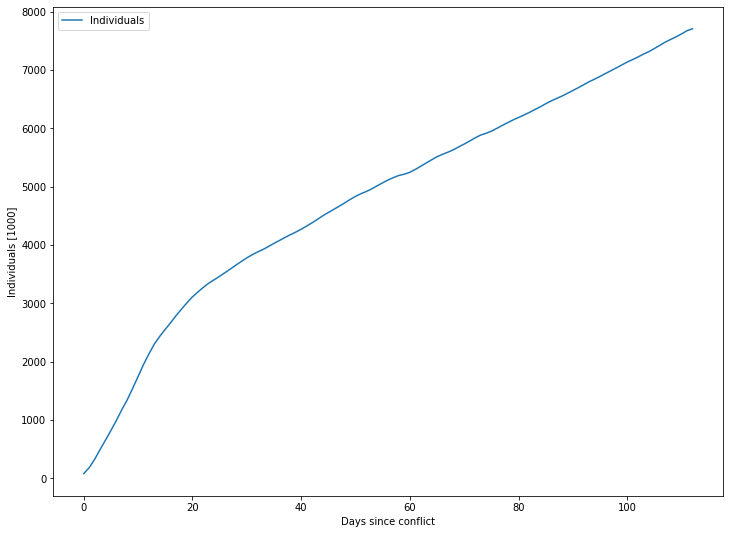

In [7]:
plt.plot(range(0, len(df)), df["individuals"]/1000, label="Individuals")
plt.xlabel("Days since conflict"); plt.ylabel("Individuals [1000]")
plt.legend(); 

In [8]:
individuals_daily = []
individuals_daily.append(df["individuals"][0])
for i in range(len(df)-1):
    c = df["individuals"][i+1] - df["individuals"][i]
    individuals_daily.append(c)

type(df["data_date"])

pandas.core.series.Series

In [9]:
s = pd.Series(individuals_daily, name="daily_individuals")

In [10]:
s

0       79209
1      100316
2      143235
3      167673
4      162012
        ...  
108     45638
109     45201
110     49631
111     54966
112     32236
Name: daily_individuals, Length: 113, dtype: int64

In [11]:
df["individuals_daily"] = s

In [12]:
df

,data_date,individuals,individuals_daily
0,2022-02-24,79209,79209
1,2022-02-25,179525,100316
2,2022-02-26,322760,143235
3,2022-02-27,490433,167673
4,2022-02-28,652445,162012
...,...,...,...
108,2022-06-12,7521823,45638
109,2022-06-13,7567024,45201
110,2022-06-14,7616655,49631
111,2022-06-15,7671621,54966


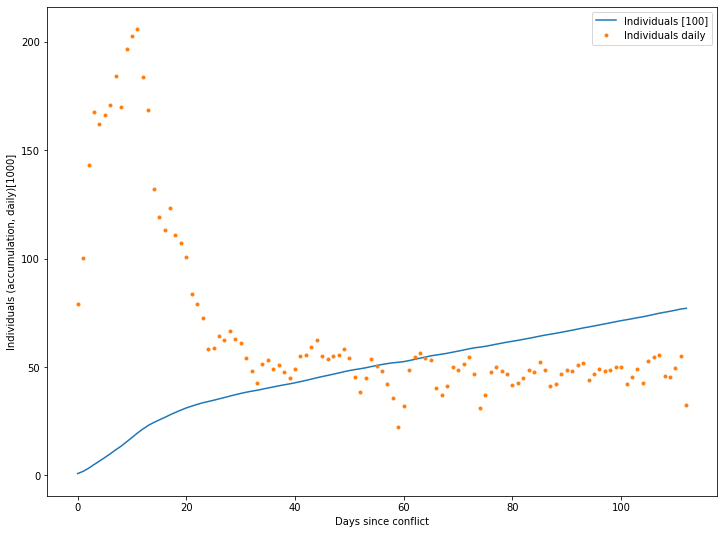

In [13]:
plt.plot(range(0, len(df)), df["individuals"]/100_000, label="Individuals [100]")
plt.plot(range(0, len(df)), df["individuals_daily"]/1000, ".", label="Individuals daily")
plt.xlabel("Days since conflict"); plt.ylabel("Individuals (accumulation, daily)[1000]")
plt.legend();

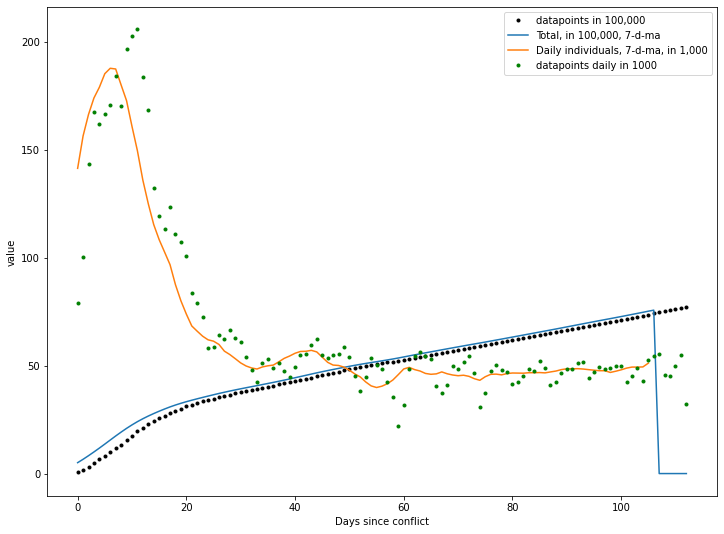

In [14]:
def moving_average(data, ma_window):
    moving_avg = data.copy()
    i = 0
    while i < len(data) - ma_window + 1:
        window = data[i : i+ma_window]
        moving_avg[i] = round(sum(window)/ma_window)
        i+=1
    moving_avg[i:len(data)+1] = 0
    return moving_avg

    
w = 7
ma7_arrivals = moving_average(df["individuals_daily"], w)
ma7_individuals = moving_average(df["individuals"], w)
plt.plot(df["individuals"]/100_000, "k.", label="datapoints in 100,000")
# strong indicator of no-data, cf line 18 "-w"
plt.plot(ma7_individuals[0:len(ma7_individuals)]/100000, label="Total, in 100,000, 7-d-ma") 
plt.plot(ma7_arrivals[0:len(ma7_arrivals)-w]/1000, label="Daily individuals, 7-d-ma, in 1,000") 
plt.plot(df["individuals_daily"]/1000, "g.", label="datapoints daily in 1000")
    
plt.xlabel("Days since conflict")
plt.ylabel("value")
plt.legend()

In [16]:
df["individuals_daily"][len(df)-7:]

106    54407
107    55410
108    45638
109    45201
110    49631
111    54966
112    32236
Name: individuals_daily, dtype: int64

In [17]:
print(f"7 day moving average of new arrivals is currentyl {ma7_arrivals[len(ma7_arrivals)-7]}.")
print("Latest day of new arrivals was at {}".format(df["individuals_daily"][len(df)-1]))

7 day moving average of new arrivals is currentyl 48213.
Latest day of new arrivals was at 32236


In [18]:
import numpy as np 
np.array(ma7_arrivals)

array([141366, 156354, 166324, 173958, 178936, 185221, 187718, 187384,
       179981, 172712, 160813, 149490, 135900, 124962, 115309, 108337,
       102568,  96754,  87465,  80020,  73863,  68362,  65931,  63624,
        61945,  61324,  59805,  56702,  55125,  53213,  51243,  49824,
        48913,  48428,  49390,  49912,  50248,  51739,  53355,  54439,
        55720,  56556,  56641,  57073,  56340,  53925,  51527,  50250,
        50072,  49307,  47854,  46153,  44760,  42442,  40609,  39857,
        40482,  41633,  43337,  45841,  48448,  49185,  48151,  47496,
        46375,  45981,  46179,  47084,  46220,  45648,  45319,  45544,
        45032,  43937,  43201,  44857,  45962,  46057,  45718,  46313,
        46575,  46534,  46485,  46707,  46706,  46780,  46638,  47072,
        47480,  48145,  48524,  48506,  48584,  48419,  48136,  47878,
        47639,  47628,  46838,  47396,  48040,  48843,  49323,  49314,
        49388,  51136,  48213,      0,      0,      0,      0,      0,
      

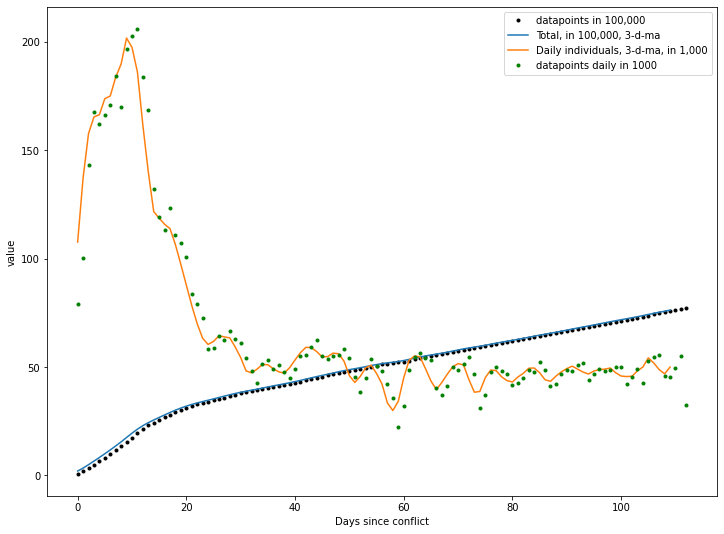

In [19]:
w = 3
ma3_new_arrivals = moving_average(df["individuals_daily"], 3)
ma3_individuals = moving_average(df["individuals"], 3)
plt.plot(df["individuals"]/100_000, "k.", label="datapoints in 100,000")
plt.plot(ma3_individuals[0:len(ma3_individuals)-w]/100000, label="Total, in 100,000, 3-d-ma")
plt.plot(ma3_new_arrivals[0:len(ma3_new_arrivals)-w]/1000, label="Daily individuals, 3-d-ma, in 1,000")
plt.plot(df["individuals_daily"]/1000, "g.", label="datapoints daily in 1000")
    
plt.xlabel("Days since conflict")
plt.ylabel("value")
plt.legend()

In [20]:
ma7_arrivals

0      141366
1      156354
2      166324
3      173958
4      178936
        ...  
108         0
109         0
110         0
111         0
112         0
Name: individuals_daily, Length: 113, dtype: int64